In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
diab=pd.read_csv('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/diabetes2.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diab.shape

(768, 9)

In [7]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
for col in diab.columns:
 missing=diab[col].isnull().sum()
 print( col,missing)

Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 0


## finding discrete and continuous num features

In [11]:
discrete=[]
for cols in diab.columns:
    if len(diab[cols].unique())<25:
      print(cols,len(diab[cols].unique()))
      discrete.append(cols)

Pregnancies 17
Outcome 2


In [12]:
continuous=[]
for cols in diab.columns:
    if len(diab[cols].unique())>25:
        print(cols,len(diab[cols].unique()))
        continuous.append(cols)

Glucose 136
BloodPressure 47
SkinThickness 51
Insulin 186
BMI 248
DiabetesPedigreeFunction 517
Age 52


In [13]:
print(discrete)

['Pregnancies', 'Outcome']


In [14]:
print(continuous)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### univariate Analysis

## distribution of pregnancy

In [15]:
print(diab['Pregnancies'].min())
print(diab['Pregnancies'].max())
print(diab['Pregnancies'].mean())
print(diab['Pregnancies'].median())
print(diab['Pregnancies'].mode()[0])
print(diab['Pregnancies'].std())

0
17
3.8450520833333335
3.0
1
3.3695780626988694


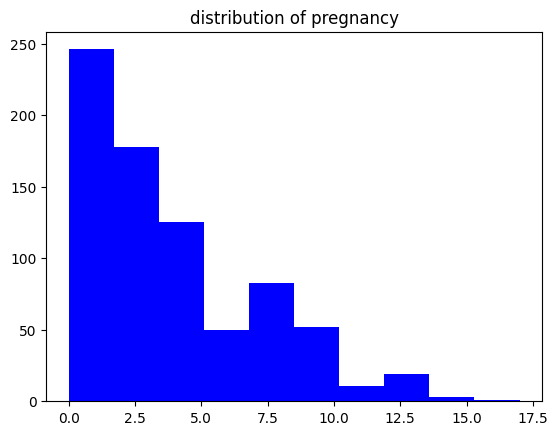

In [16]:
plt.hist(x='Pregnancies',data=diab,color='blue')
plt.title('distribution of pregnancy')
plt.show()

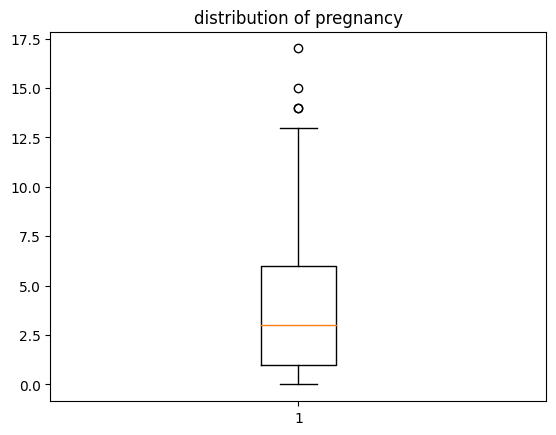

In [17]:
plt.boxplot(x='Pregnancies',data=diab)
plt.title('distribution of pregnancy')
plt.show()

In [18]:
#outliers and rightskewed data in pregnancy feature

## outcome feature , a look

In [19]:
diab['Outcome'].unique()

array([1, 0], dtype=int64)

In [20]:
diab['Outcome'].value_counts()   #data has more zero diabetes patients

Outcome
0    500
1    268
Name: count, dtype: int64

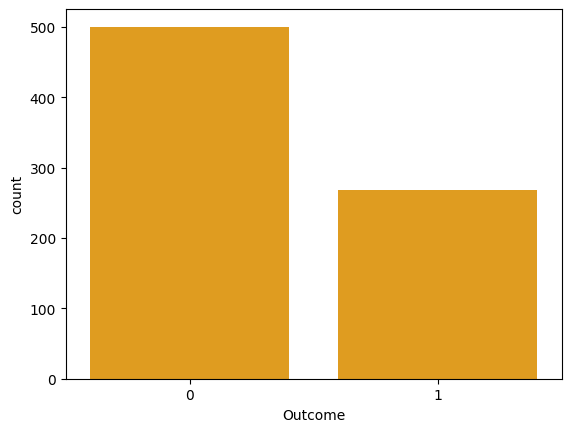

In [21]:
sns.countplot(x=diab['Outcome'],color='orange')
plt.show()

## distribution of Glucose

In [22]:
print(diab['Glucose'].min())
print(diab['Glucose'].max())
print(diab['Glucose'].mean())
print(diab['Glucose'].median())
print(diab['Glucose'].mode()[0])
print(diab['Glucose'].std())

0
199
120.89453125
117.0
99
31.97261819513622


In [23]:
(diab['Glucose']==0).sum()  #glucose level cant be 0, so np.nan #many took with fasting so mode is 99 #median 120 is normal glucose level

5

In [24]:
diab['Glucose']=diab['Glucose'].replace(0,np.nan)

In [25]:
diab['Glucose'].isnull().sum()

5

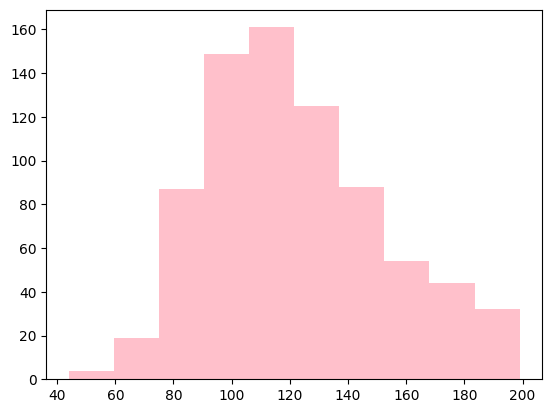

In [26]:
plt.hist(x='Glucose',data=diab,color='pink')
plt.show()

## Distribution of Blood Presssure

In [27]:
print(diab['BloodPressure'].min())
print(diab['BloodPressure'].max())
print(diab['BloodPressure'].mean())
print(diab['BloodPressure'].median())
print(diab['BloodPressure'].mode()[0])
print(diab['BloodPressure'].std())

0
122
69.10546875
72.0
70
19.355807170644777


In [28]:
diab['BloodPressure']=diab['BloodPressure'].replace(0,np.nan)

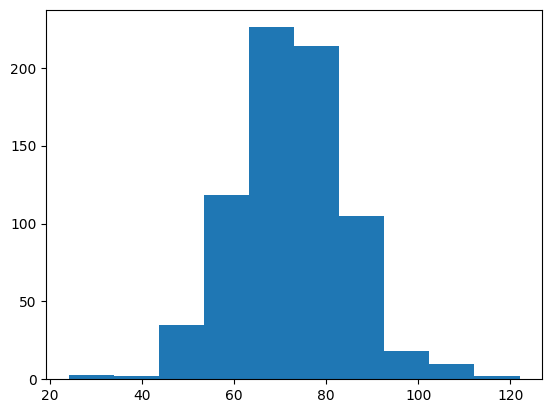

In [29]:
plt.hist(x='BloodPressure',data=diab)
plt.show()

In [30]:
print(diab['SkinThickness'].min())
print(diab['SkinThickness'].max())
print(diab['SkinThickness'].mean())
print(diab['SkinThickness'].median())
print(diab['SkinThickness'].mode()[0])
print(diab['SkinThickness'].std())


0
99
20.536458333333332
23.0
0
15.952217567727637


In [31]:
diab['SkinThickness']=diab['SkinThickness'].replace(0,np.nan)

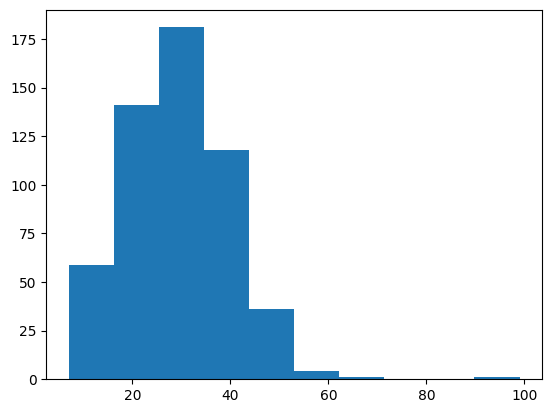

In [32]:
plt.hist(x='SkinThickness',data=diab)
plt.show()

In [33]:
print(diab['Insulin'].min())
print(diab['Insulin'].max())
print(diab['Insulin'].mean())
print(diab['Insulin'].median())
print(diab['Insulin'].mode()[0])
print(diab['Insulin'].std())

0
846
79.79947916666667
30.5
0
115.24400235133817


In [34]:
diab['Insulin']=diab['Insulin'].replace(0,np.nan) #large diff between mean and median means the std , the variation in data is more

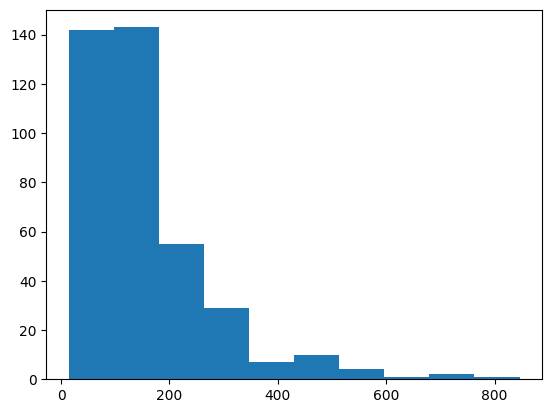

In [35]:
plt.hist(x='Insulin',data=diab)
plt.show()

In [36]:
print(diab['BMI'].min())
print(diab['BMI'].max())
print(diab['BMI'].mean())
print(diab['BMI'].median())
print(diab['BMI'].mode()[0])
print(diab['BMI'].std())

0.0
67.1
31.992578124999998
32.0
32.0
7.884160320375446


In [37]:
diab['BMI']=diab['BMI'].replace(0,np.nan)

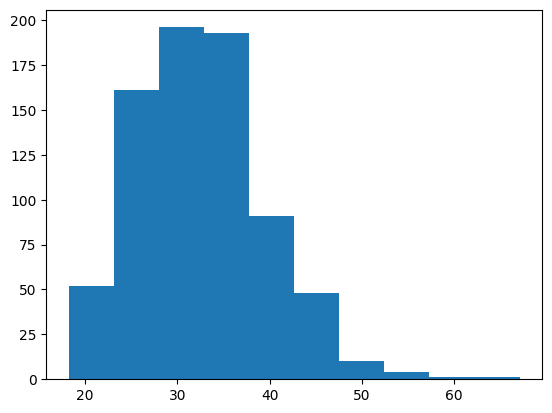

In [38]:
plt.hist(x='BMI',data=diab)
plt.show()

In [39]:
print(diab['DiabetesPedigreeFunction'].min())
print(diab['DiabetesPedigreeFunction'].max())
print(diab['DiabetesPedigreeFunction'].mean())
print(diab['DiabetesPedigreeFunction'].median())
print(diab['DiabetesPedigreeFunction'].mode()[0])
print(diab['DiabetesPedigreeFunction'].std())

0.078
2.42
0.47187630208333325
0.3725
0.254
0.3313285950127749


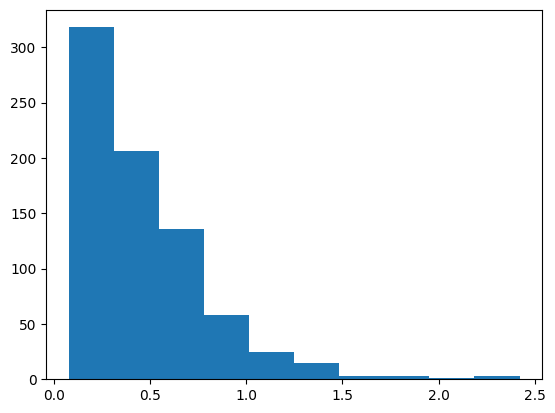

In [40]:
plt.hist(x='DiabetesPedigreeFunction',data=diab)
plt.show()

In [41]:
print(diab['Age'].min())
print(diab['Age'].max())
print(diab['Age'].mean())
print(diab['Age'].median())
print(diab['Age'].mode()[0])
print(diab['Age'].std())

21
81
33.240885416666664
29.0
22
11.760231540678685


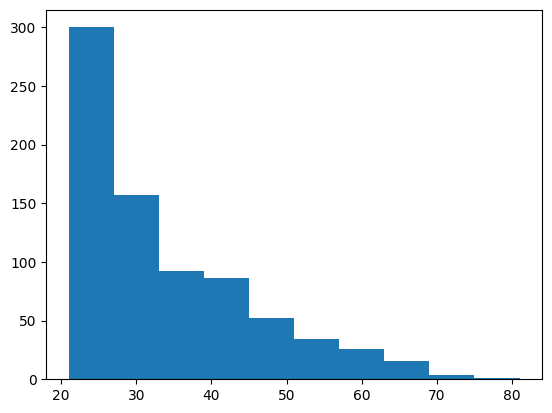

In [42]:
plt.hist(x='Age',data=diab)
plt.show()

### Bivariate analysis

## Distribution of pregancy with other features

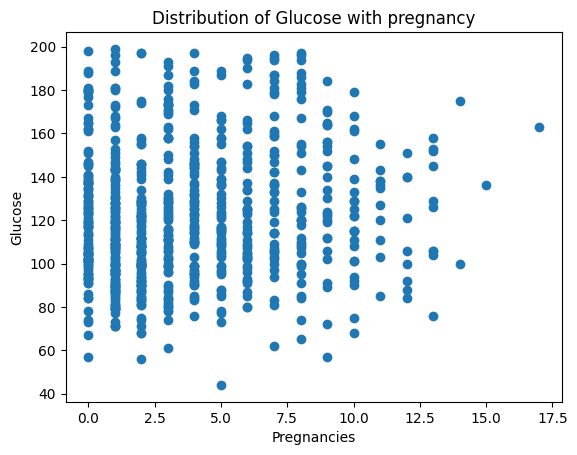

In [43]:
plt.scatter(x='Pregnancies',y='Glucose',data=diab)
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.title('Distribution of Glucose with pregnancy')
plt.show()

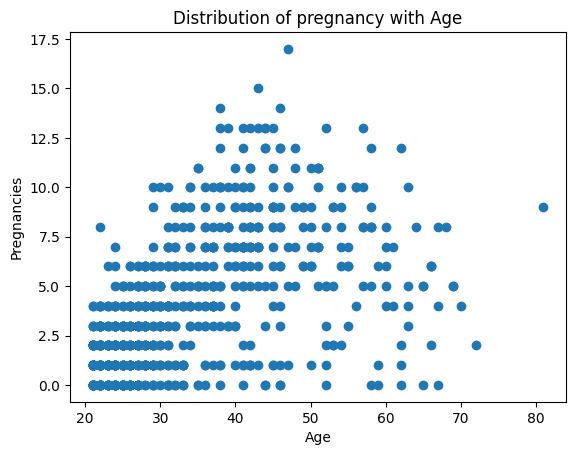

In [44]:
plt.scatter(x='Age',y='Pregnancies',data=diab)
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Distribution of pregnancy with Age')
plt.show()

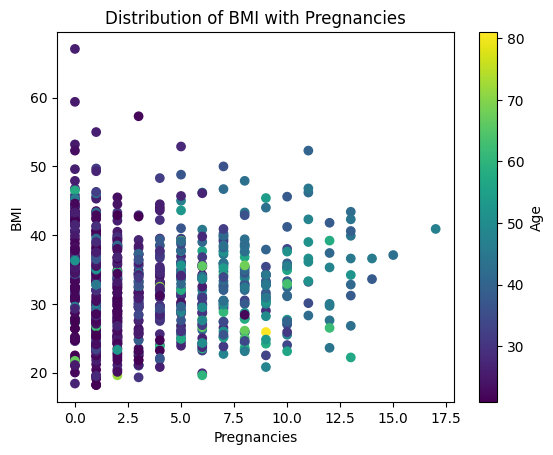

In [45]:
plt.scatter(x='Pregnancies',y='BMI',c='Age', cmap='viridis',data=diab)
plt.xlabel('Pregnancies')
plt.ylabel('BMI')
plt.colorbar(label='Age')
plt.title('Distribution of BMI with Pregnancies')
plt.show()

## Distribution of Glucose

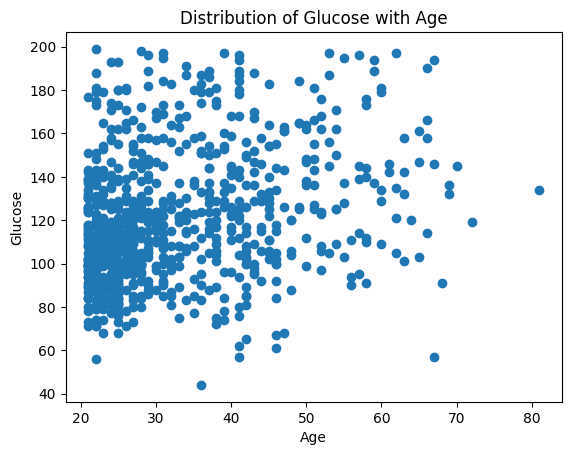

In [46]:
plt.scatter(x='Age',y='Glucose',data=diab)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Distribution of Glucose with Age')
plt.show()

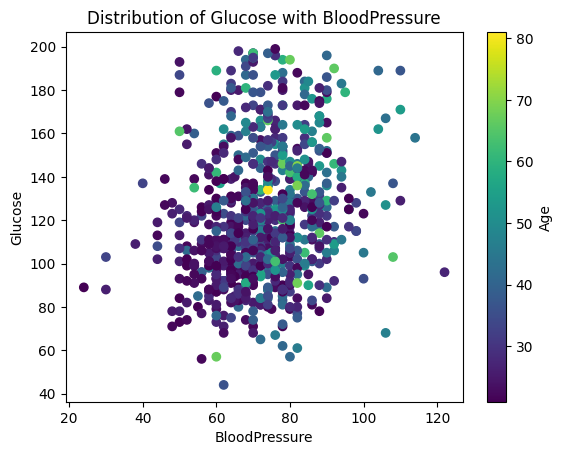

In [47]:
plt.scatter(x='BloodPressure',y='Glucose',data=diab,c='Age',cmap='viridis')
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.colorbar(label='Age')
plt.title('Distribution of Glucose with BloodPressure')
plt.show()

In [48]:
#observations:
#most of the people have a normal BP but bit high sugar content in blood
#most women are pregnant between 20 and 30, with people having varied sugar(no relation between age and sugar)
#women with more than 7 pregnancy have a little higher BMI than who conceived less


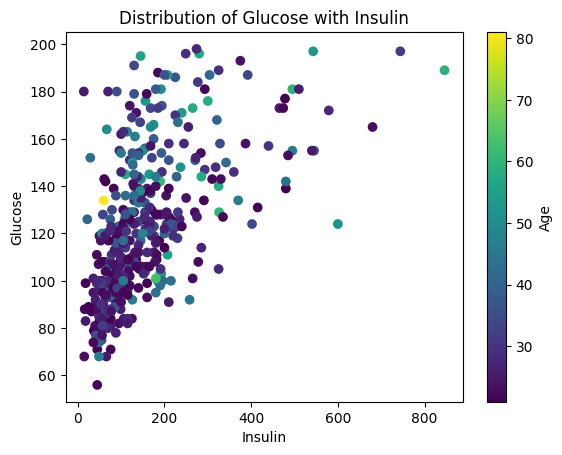

In [49]:
plt.scatter(x='Insulin',y='Glucose',data=diab,c='Age',cmap='viridis')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.colorbar(label='Age')
plt.title('Distribution of Glucose with Insulin')
plt.show()

In [50]:
#glucose and insilin has a linear relationship, we can draw a staright line through it

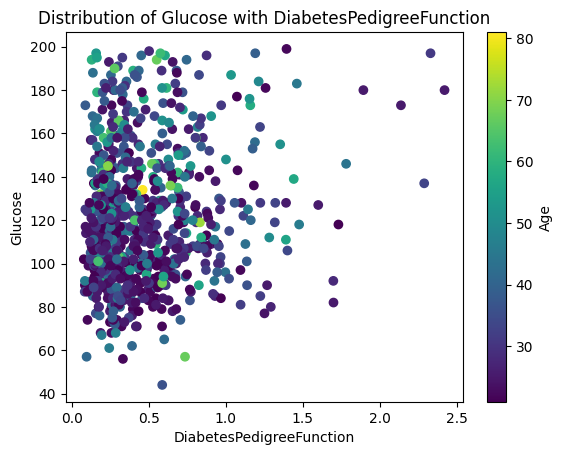

In [51]:
plt.scatter(x='DiabetesPedigreeFunction',y='Glucose',data=diab,c='Age',cmap='viridis')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Glucose')
plt.colorbar(label='Age')
plt.title('Distribution of Glucose with DiabetesPedigreeFunction')
plt.show()

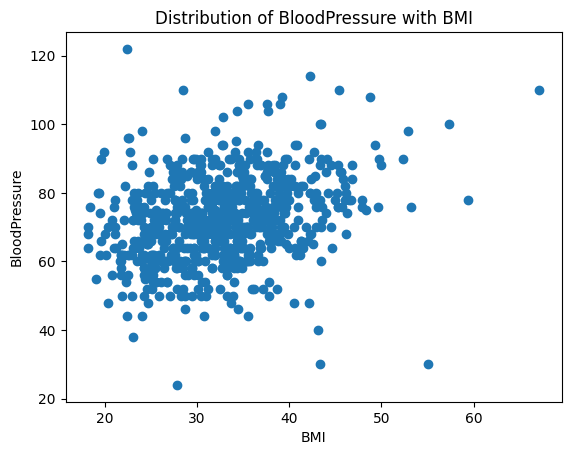

In [52]:
plt.scatter(x='BMI',y='BloodPressure',data=diab)
plt.xlabel('BMI')
plt.ylabel('BloodPressure')
plt.title('Distribution of BloodPressure with BMI')
plt.show()

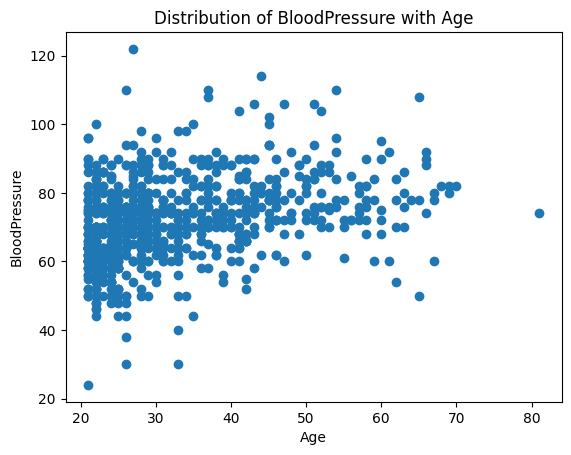

In [53]:
plt.scatter(x='Age',y='BloodPressure',data=diab)
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('Distribution of BloodPressure with Age')
plt.show()

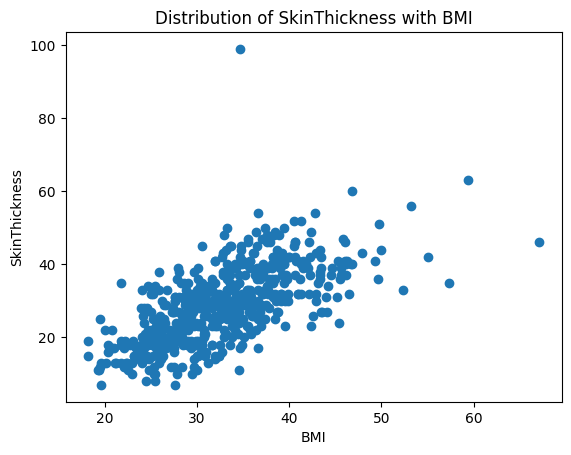

In [54]:
plt.scatter(x='BMI',y='SkinThickness',data=diab)
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('Distribution of SkinThickness with BMI')
plt.show()

In [55]:
#BMI and skin are linearly associated with each other

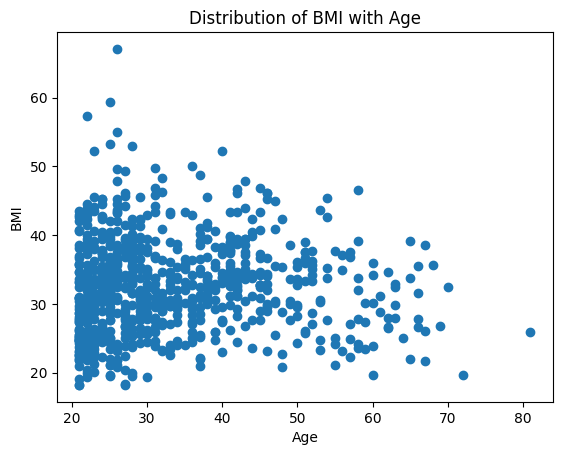

In [56]:
plt.scatter(x='Age',y='BMI',data=diab)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Distribution of BMI with Age')
plt.show()

## FEATURE ENGINEERING

In [57]:
for cols in diab.columns:
    print(cols,diab[cols].isnull().sum())

Pregnancies 0
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 0


## Imputing missing values using central tendency

In [58]:
(diab['Pregnancies']==0).sum() #but pregnancy can be zero

111

In [59]:
diab['Pregnancies']=diab['Pregnancies']+0.0001

In [60]:
(diab['Age']==0).sum() 

0

In [61]:
diab['Glucose'].fillna(diab['Glucose'].mean(),inplace=True)

In [62]:
diab['BloodPressure'].fillna(diab['BloodPressure'].mean(),inplace=True)

In [63]:
diab['SkinThickness'].fillna(diab['SkinThickness'].median(),inplace=True)
diab['Insulin'].fillna(diab['Insulin'].median(),inplace=True)

In [64]:
diab['BMI'].fillna(diab['BMI'].median(),inplace=True)

In [65]:
for cols in diab.columns:
    print(cols,diab[cols].isnull().sum())

Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 0


In [66]:
#Log transformation for right skwed data

In [67]:
diab['log_Pregnancies']=np.log(diab['Pregnancies'])
diab['log_SkinThickness']=np.log(diab['SkinThickness'])  
diab['log_Insulin']=np.log(diab['Insulin'])
diab['log_BMI']=np.log(diab['BMI'])
diab['log_DiabetesPedigreeFunction']=np.log(diab['DiabetesPedigreeFunction'])
diab['log_Age']=np.log(diab['Age'])                             

In [68]:
#Z score Normalisation

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
diab['Normalised_Glucose']=scaler.fit_transform(diab[['Glucose']])

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
diab['Normalised_BP']=scaler.fit_transform(diab[['BloodPressure']])

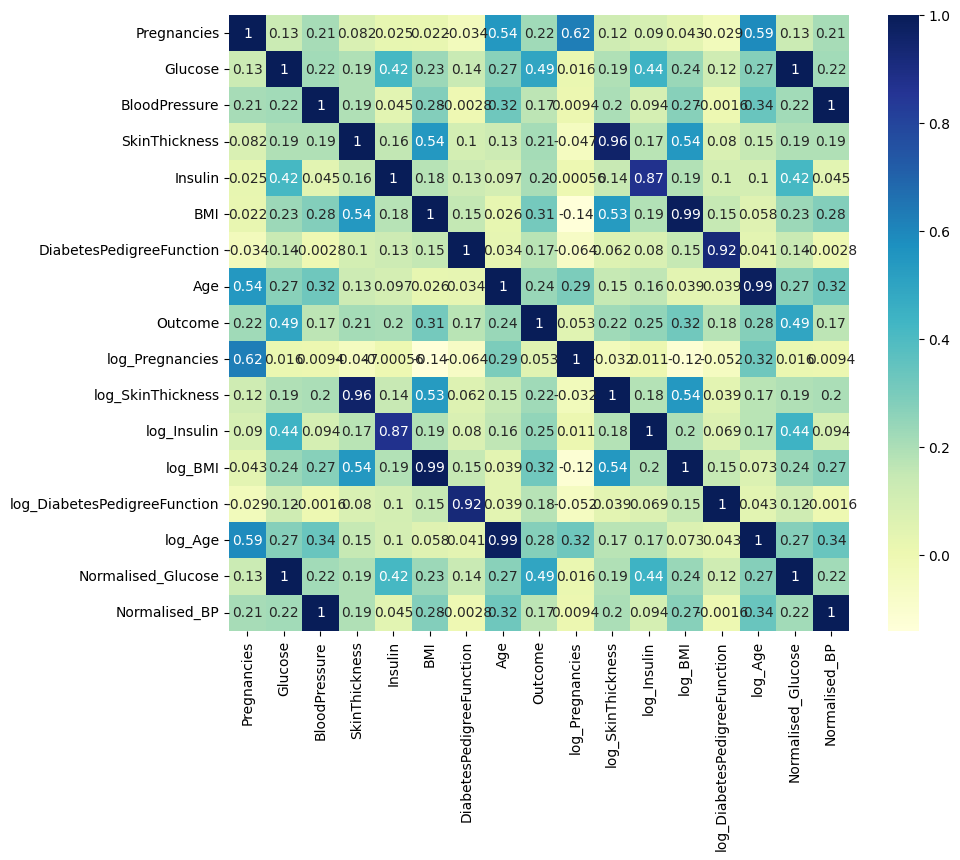

In [71]:
plt.figure(figsize=(10,8))
corr_matrix=diab.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

In [72]:
##Highly correlated feature pairs -Glucose & Insulin  ,Age&pregnancy  ,SkinThickness&BMI 

In [74]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'log_Pregnancies',
       'log_SkinThickness', 'log_Insulin', 'log_BMI',
       'log_DiabetesPedigreeFunction', 'log_Age', 'Normalised_Glucose',
       'Normalised_BP'],
      dtype='object')

In [79]:
diab.head(2)

,log_Pregnancies,log_SkinThickness,log_Insulin,log_BMI,log_DiabetesPedigreeFunction,log_Age,Normalised_Glucose,Normalised_BP,Outcome
0,1.791776,3.555348,4.828314,3.514526,-0.466809,3.912023,0.865108,-0.033518,1
1,0.000100,3.367296,4.828314,3.280911,-1.046969,3.433987,-1.206162,-0.529859,0


In [76]:
diab.drop(diab.columns[:8],axis=1,inplace=True)

In [78]:
columns_needed=list(diab.columns.drop('Outcome')) + ['Outcome']
diab=diab.reindex(columns=columns_needed)

In [81]:
X=diab.iloc[:,:-1].values
y=diab.iloc[:,-1].values

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.metrics import accuracy_score,classification_report

In [100]:
models={
    'Logistic Regression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVM':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier()
}

In [102]:
for model_name,model in models.items():
    print(f"Model {model_name}...")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.3f}")
    print(classification_report(y_test,y_pred))
    print("======================================================================")

Model Logistic Regression...
Accuracy of Logistic Regression: 0.779
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154

Model KNN...
Accuracy of KNN: 0.805
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       107
           1       0.67      0.72      0.69        47

    accuracy                           0.81       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

Model SVM...
Accuracy of SVM: 0.773
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       107
           1       0.67      0.51      0.58        47

    accuracy                           0.7